In [2]:
import matplotlib.pyplot as plt
import orbipy as op
import numpy as np
import pandas as pd

In [3]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
halo_orbits = pd.read_csv(f'data/datasets/halo_general_low_l2.csv')

i = 10
zero_state = model.get_zero_state().copy()
zero_state[0] = halo_orbits.iloc[[i]]['x']
zero_state[2] = halo_orbits.iloc[[i]]['z']
zero_state[4] = halo_orbits.iloc[[i]]['v']
one_thousand_kms = (1-model.L1) / 61.350


left = op.eventX(model.L2 - 25 * one_thousand_kms)
right = op.eventX(model.L2 + 15 * one_thousand_kms)
print(left, right)

eventX:[val]np.float64(1.0892390904661182) [dir]0 [trm]True [acc]True [cnt]-1 eventX:[val]np.float64(1.1955937378737933) [dir]0 [trm]True [acc]True [cnt]-1


/tmp/ipykernel_2716079/3903405444.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[0] = halo_orbits.iloc[[i]]['x']
/tmp/ipykernel_2716079/3903405444.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[2] = halo_orbits.iloc[[i]]['z']
/tmp/ipykernel_2716079/3903405444.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[4] = halo_orbits.iloc[[i]]['v']


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


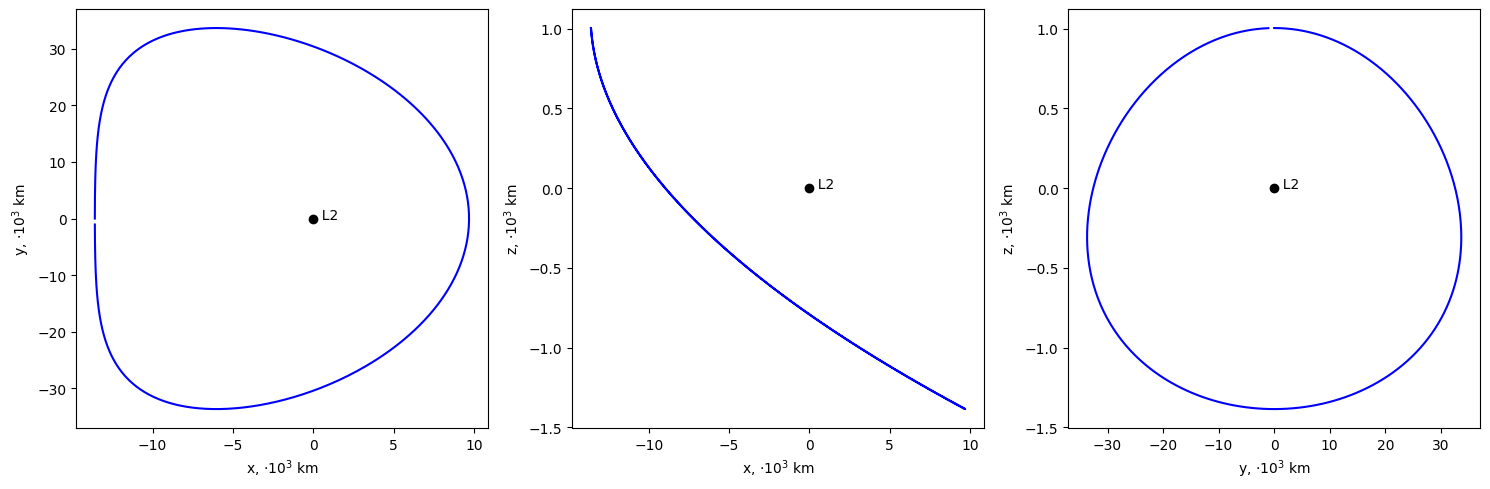

In [82]:
df = model.prop(zero_state, 0, 3.4)

plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L2})
plotter.plot_proj(ax=ax, centers={'x':model.L2}, plottables=[plotter.L2], colors='k',ls='',marker='o')


In [4]:
event = [op.eventY(count=3)]
first_correction = op.border_correction(model, op.y_direction(), left, right)
correction = op.border_correction(model, op.unstable_direction(model), left, right)
impulse_correction_method = op.simple_station_keeping(model, first_correction, correction, np.pi, events=event)

df = impulse_correction_method.prop(0.0, zero_state, N=5)

time = impulse_correction_method.evout[:3,3]
period = (time[-1] - time[-2])*2
print(period)

Simple station-keeping: 0 1 2 3 4 
3.415495297935271


/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


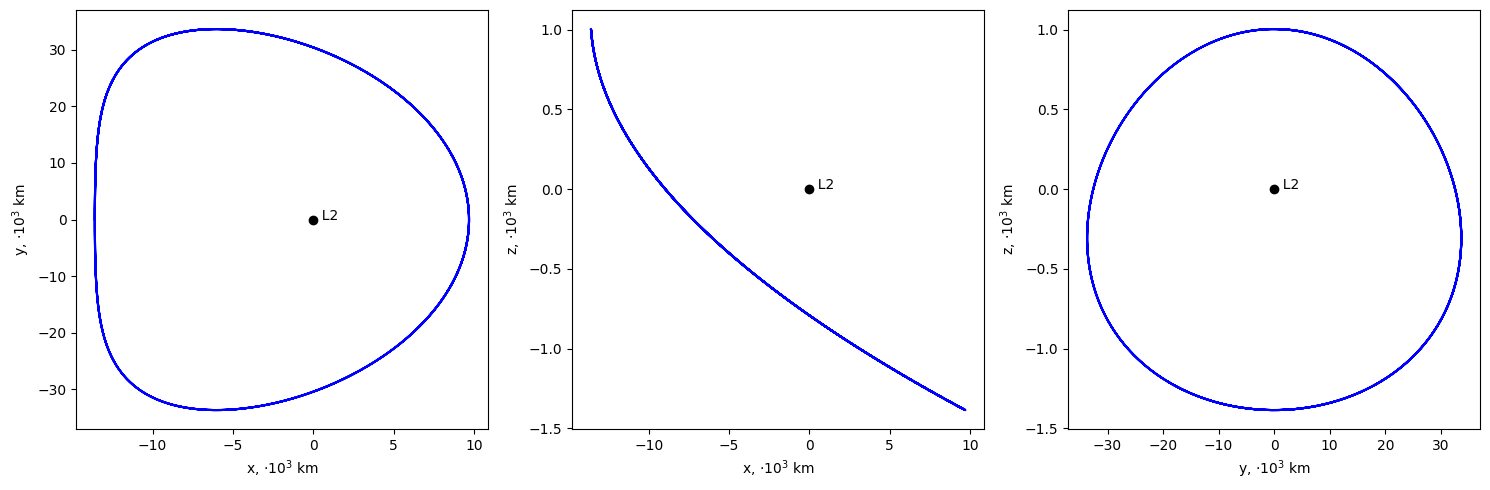

In [8]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L2})
plotter.plot_proj(ax=ax, centers={'x':model.L2}, plottables=[plotter.L2], colors='k',ls='',marker='o')

In [2]:
# =====================================
def get_dv_sum_for_dt(model, total_time, dt, initial_state):
    first_correction = op.border_correction(model, op.y_direction(), left, right)
    correction = op.border_correction(model, op.unstable_direction(model), left, right)
    impulse_correction_method = op.strict_station_keeping(model, first_correction, correction, dt, maxdv=1e2)
    
    df = impulse_correction_method.prop(0.0, initial_state, N=int(total_time // dt))
    dv_norms = np.linalg.norm(impulse_correction_method.dvout[:,3:6], axis=1)
    return [np.sum(dv_norms), dt], df
    

In [3]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
halo_orbits = pd.read_csv(f'data/datasets/halo_general_low_l2.csv')

i = 300
period = 3.415495297935271

zero_state = model.get_zero_state().copy()
zero_state[0] = halo_orbits.iloc[[i]]['x']
zero_state[2] = halo_orbits.iloc[[i]]['z']
zero_state[4] = halo_orbits.iloc[[i]]['v']
one_thousand_kms = (1-model.L1) / 61.350

left = op.eventX(model.L2 - 32 * one_thousand_kms)
right = op.eventX(model.L2 + 7 * one_thousand_kms)

# total_time = 50*np.pi
total_time = 25*period

dv_graph_data = []
# dts = [np.pi, np.pi/2, 1.3, np.pi/3, np.pi/4, np.pi/5, np.pi/6, np.pi/7, 0.45, np.pi/8, 0.35, np.pi/9, np.pi/10, np.pi/11]
# dts = np.linspace(np.pi/4, np.pi/8, 15)
# dts = [np.pi/18, np.pi/22,  np.pi/26, np.pi/30]
dts = [period/n for n in range(1, 14)]
print(dts)

for dt in dts:
    try:
        sum, _ = get_dv_sum_for_dt(model, total_time, dt, zero_state.copy())
    except (RuntimeError, ValueError) as e:
        print(e, sep=' ')  
        print("++++++ dt = " + str(dt) + " failed!")
        continue
    dv_graph_data.append(sum)
    print(sum)
    
print(dv_graph_data)
np.savetxt('data/dv_data/dv_graph_data_6_period.txt', dv_graph_data)

/tmp/ipykernel_18314/1776638096.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[0] = halo_orbits.iloc[[i]]['x']
/tmp/ipykernel_18314/1776638096.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[2] = halo_orbits.iloc[[i]]['z']
/tmp/ipykernel_18314/1776638096.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  zero_state[4] = halo_orbits.iloc[[i]]['v']


[3.415495297935271, 1.7077476489676355, 1.1384984326450904, 0.8538738244838178, 0.6830990595870542, 0.5692492163225452, 0.48792789970503875, 0.4269369122419089, 0.37949947754836344, 0.3415495297935271, 0.3104995725395701, 0.2846246081612726, 0.26273040753348237]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
[np.float64(1.4209640502929687e-11), 3.415495297935271]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 
[np.float64(1.32257080078125e-12), 1.7077476489676355]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 
[np.float64(8.753662109375e-13), 1.1384984326450904]
Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 2

In [4]:
# dv_graph_data_1 = np.loadtxt('dv_graph_data_4.txt')
# dv_graph_data_2 = np.loadtxt('dv_graph_data_5.txt')
# dv_graph_data = np.concatenate([dv_graph_data_1, dv_graph_data_2])

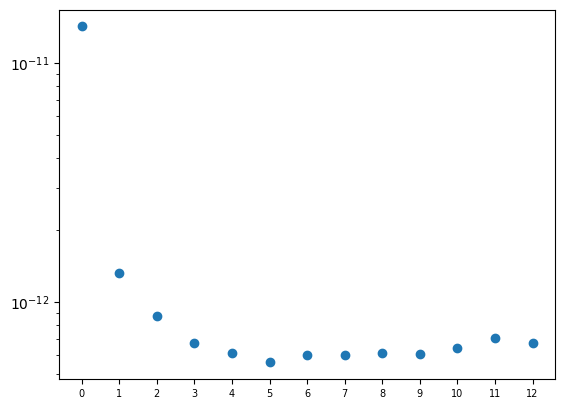

In [3]:
dv_graph_data = np.loadtxt('data/dv_data/dv_graph_data_6_period.txt') #L2 period 3.415495297935271

y_data = dv_graph_data[:,0]
x_data = np.arange(len(y_data))
x_ticks = dv_graph_data[:,1]
plt.xticks(x_data, fontsize=7)

plt.scatter(x_data, y_data)
plt.yscale('log')

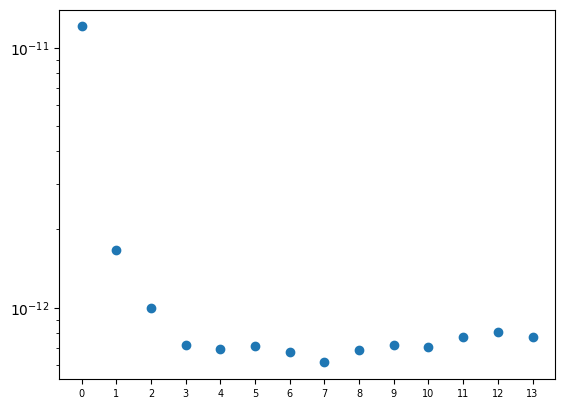

In [5]:
dv_graph_data = np.loadtxt('data/dv_data/dv_graph_data_8_period.txt') # L1 period ??

y_data = dv_graph_data[:,0]
x_data = np.arange(len(y_data))
x_ticks = dv_graph_data[:,1]
plt.xticks(x_data, fontsize=7)

plt.scatter(x_data, y_data)
plt.yscale('log')

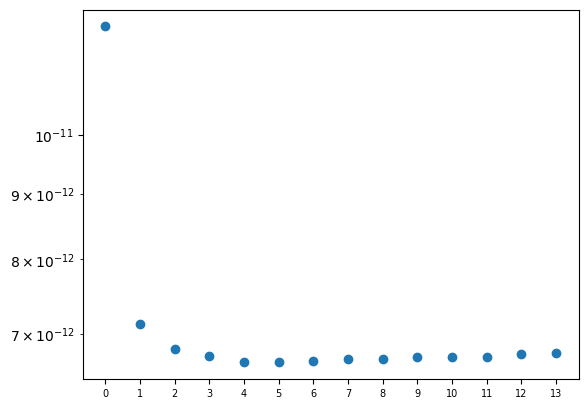

In [6]:
dv_graph_data = np.loadtxt('data/dv_data/dv_graph_data_9_period.txt') # L1 period 1.8816986386630559

y_data = dv_graph_data[:,0]
x_data = np.arange(len(y_data))
x_ticks = dv_graph_data[:,1]
plt.xticks(x_data, fontsize=7)

plt.scatter(x_data, y_data)
plt.yscale('log')

In [11]:
x_data_ticks = np.loadtxt('x_data.txt')
x_ticks = np.load('x_ticks.npy')
y_data = np.loadtxt('y_data.txt')

y_data = np.concatenate([y_data, dv_graph_data[:,0]])
x_data_ticks = np.arange(len(y_data))
x_ticks = np.concatenate([x_ticks, np.array(['pi/12', 'pi/13', 'pi/14', 'pi/15', 'pi/16', 'pi/18', 'pi/22', 'pi/26', 'pi/30'])])



In [17]:
np.savetxt('x_data_1.txt', x_data_ticks)
np.save('x_ticks_1.npy', x_ticks)
np.savetxt('y_data_1.txt', y_data)

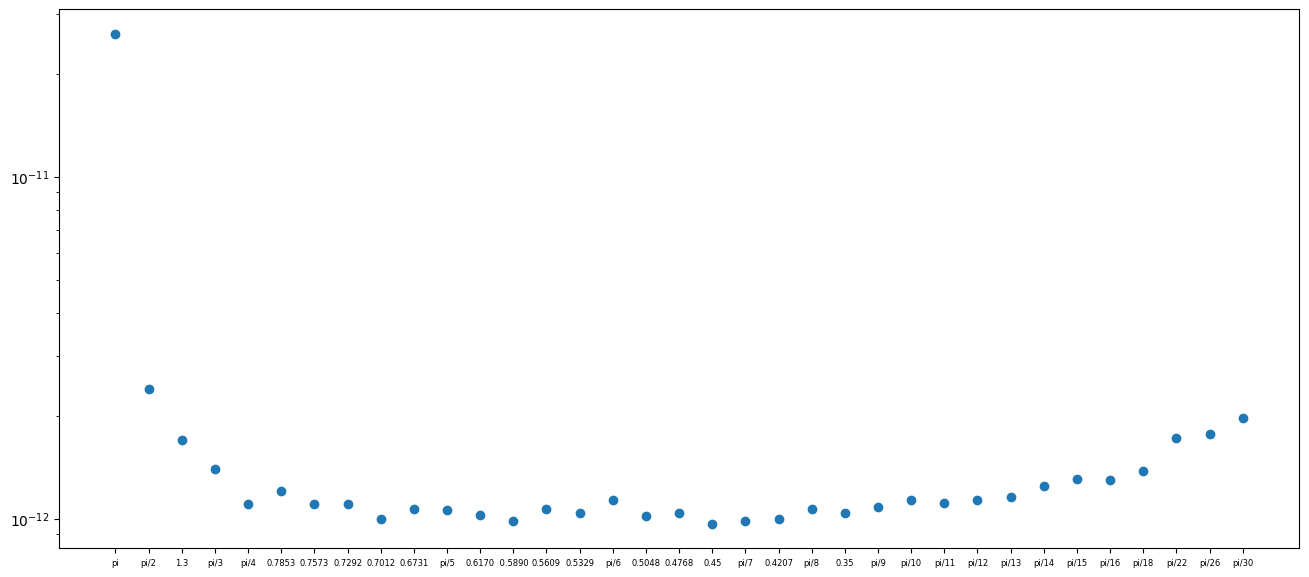

In [18]:
x_data_ticks = np.loadtxt('x_data_1.txt')
x_ticks = np.load('x_ticks_1.npy')
y_data = np.loadtxt('y_data_1.txt')

plt.figure(figsize=(16, 7))
plt.xticks(x_data_ticks, x_ticks, fontsize=6)

plt.scatter(x_data_ticks, y_data)
plt.yscale('log')
